# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [2]:
df = pd.read_csv("housing.csv")


df.head()

print("\nValores nulos por coluna:\n", df.isnull().sum())

df = df.dropna()

df = pd.get_dummies(df)

print("\nTipos de dados:\n", df.dtypes)

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Valores nulos por coluna:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Tipos de dados:
 longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

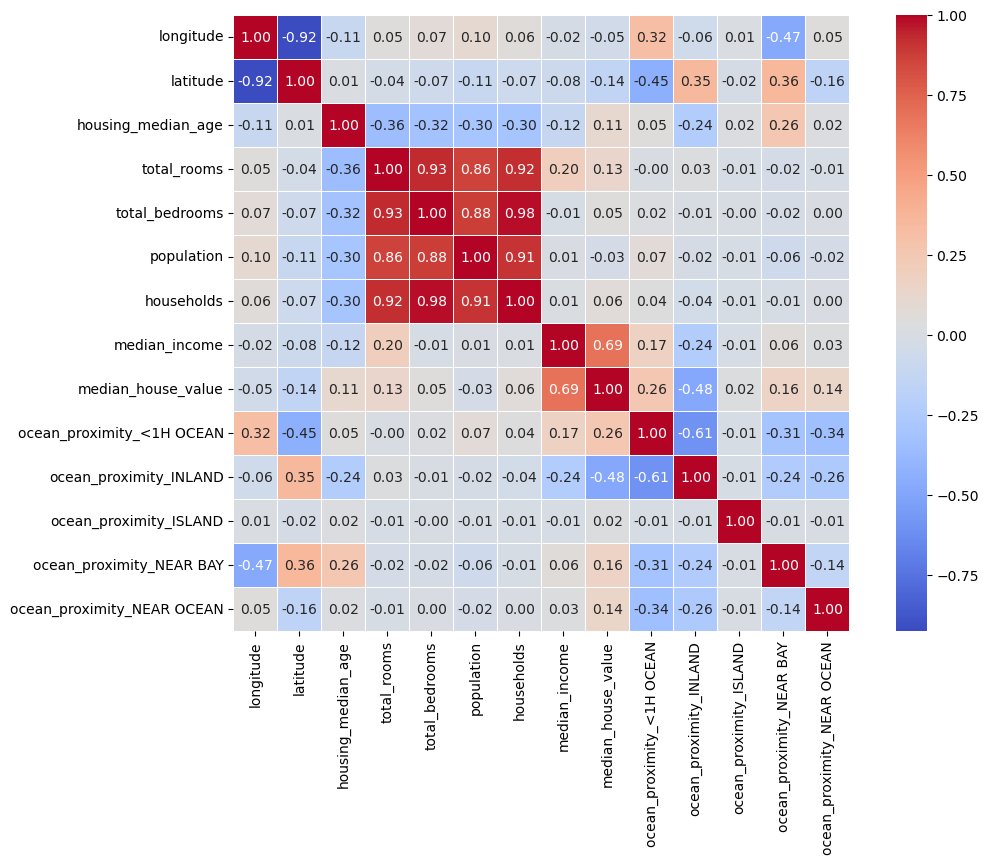


Correlação com 'median_house_value':
 median_house_value            1.000000
median_income                 0.688355
ocean_proximity_<1H OCEAN     0.257614
ocean_proximity_NEAR BAY      0.160526
ocean_proximity_NEAR OCEAN    0.140378
total_rooms                   0.133294
housing_median_age            0.106432
households                    0.064894
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023525
population                   -0.025300
longitude                    -0.045398
latitude                     -0.144638
ocean_proximity_INLAND       -0.484787
Name: median_house_value, dtype: float64


In [4]:
import numpy as np
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.show()

cor_target = corr_matrix["median_house_value"].sort_values(ascending=False)
print("\nCorrelação com 'median_house_value':\n", cor_target)

### 3. Separe os dados em validação e teste

In [5]:

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_treino:", X_treino.shape)
print("X_teste:", X_teste.shape)
print("y_treino:", y_treino.shape)
print("y_teste:", y_teste.shape)

X_treino: (14303, 13)
X_teste: (6130, 13)
y_treino: (14303,)
y_teste: (6130,)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [6]:
arvore_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
arvore_8.fit(X_treino, y_treino)

arvore_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
arvore_2.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [8]:
from sklearn.metrics import mean_squared_error

y_pred_treino_8 = arvore_8.predict(X_treino)
y_pred_teste_8 = arvore_8.predict(X_teste)

y_pred_treino_2 = arvore_2.predict(X_treino)
y_pred_teste_2 = arvore_2.predict(X_teste)

mse_treino_8 = mean_squared_error(y_treino, y_pred_treino_8)
mse_teste_8 = mean_squared_error(y_teste, y_pred_teste_8)

mse_treino_2 = mean_squared_error(y_treino, y_pred_treino_2)
mse_teste_2 = mean_squared_error(y_teste, y_pred_teste_2)

print("Árvore com profundidade 8:")
print(f" - MSE Treinamento: {mse_treino_8:.2f}")
print(f" - MSE Teste: {mse_teste_8:.2f}")

print("\nÁrvore com profundidade 2:")
print(f" - MSE Treinamento: {mse_treino_2:.2f}")
print(f" - MSE Teste: {mse_teste_2:.2f}")

Árvore com profundidade 8:
 - MSE Treinamento: 3155880403.70
 - MSE Teste: 3941659635.32

Árvore com profundidade 2:
 - MSE Treinamento: 6712935748.76
 - MSE Teste: 6785906662.45


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [ ]:
A árvore com profundidade 2 tende a ser mais adequada, pois generaliza melhor para novos dados. Ela apresenta um equilíbrio entre erro de treinamento e de teste, o que indica menor risco de overfitting.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

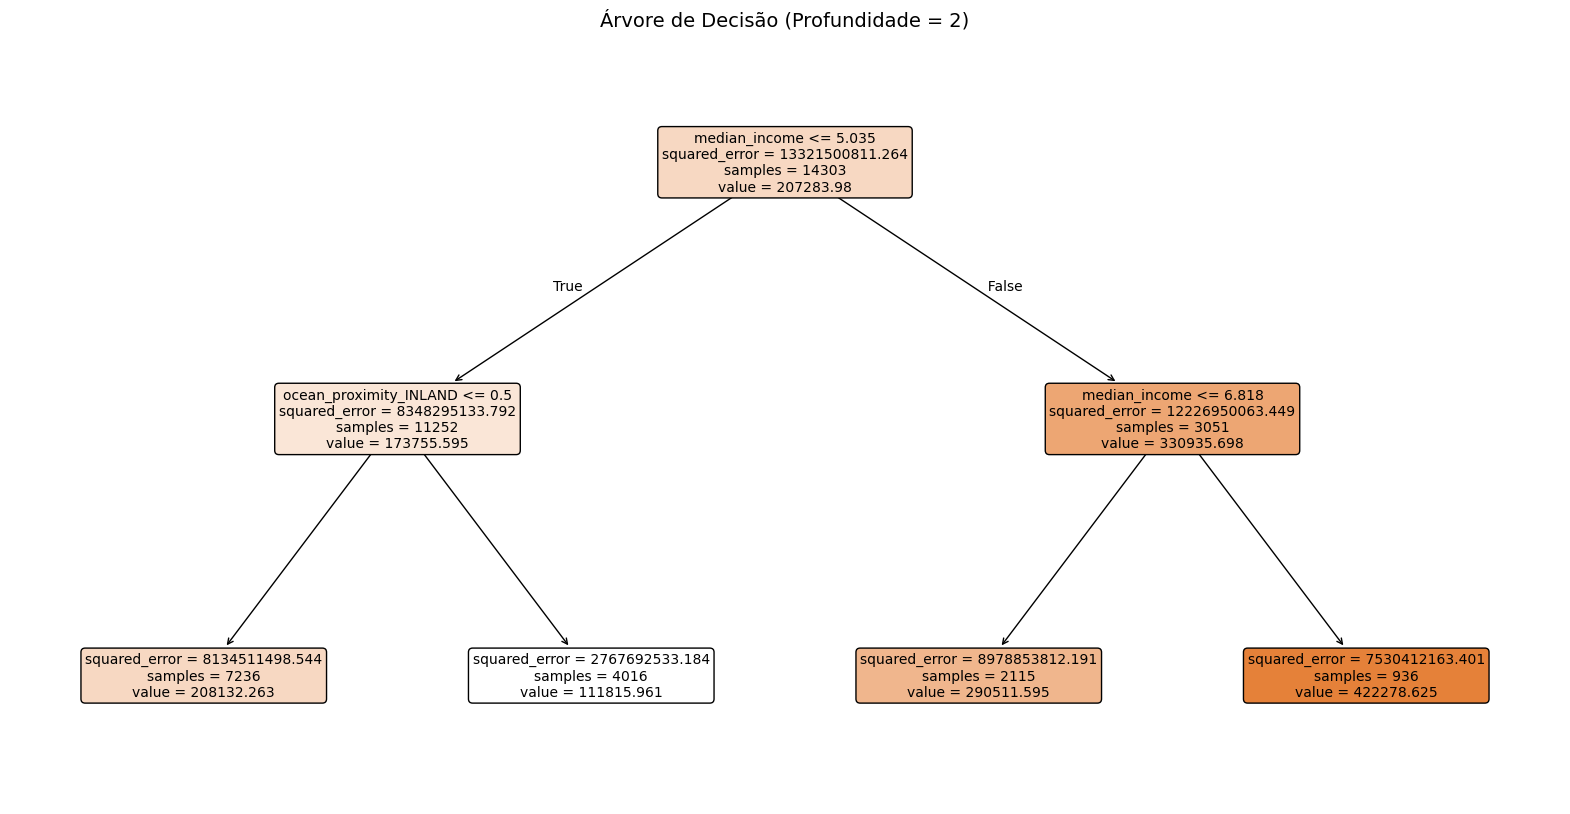

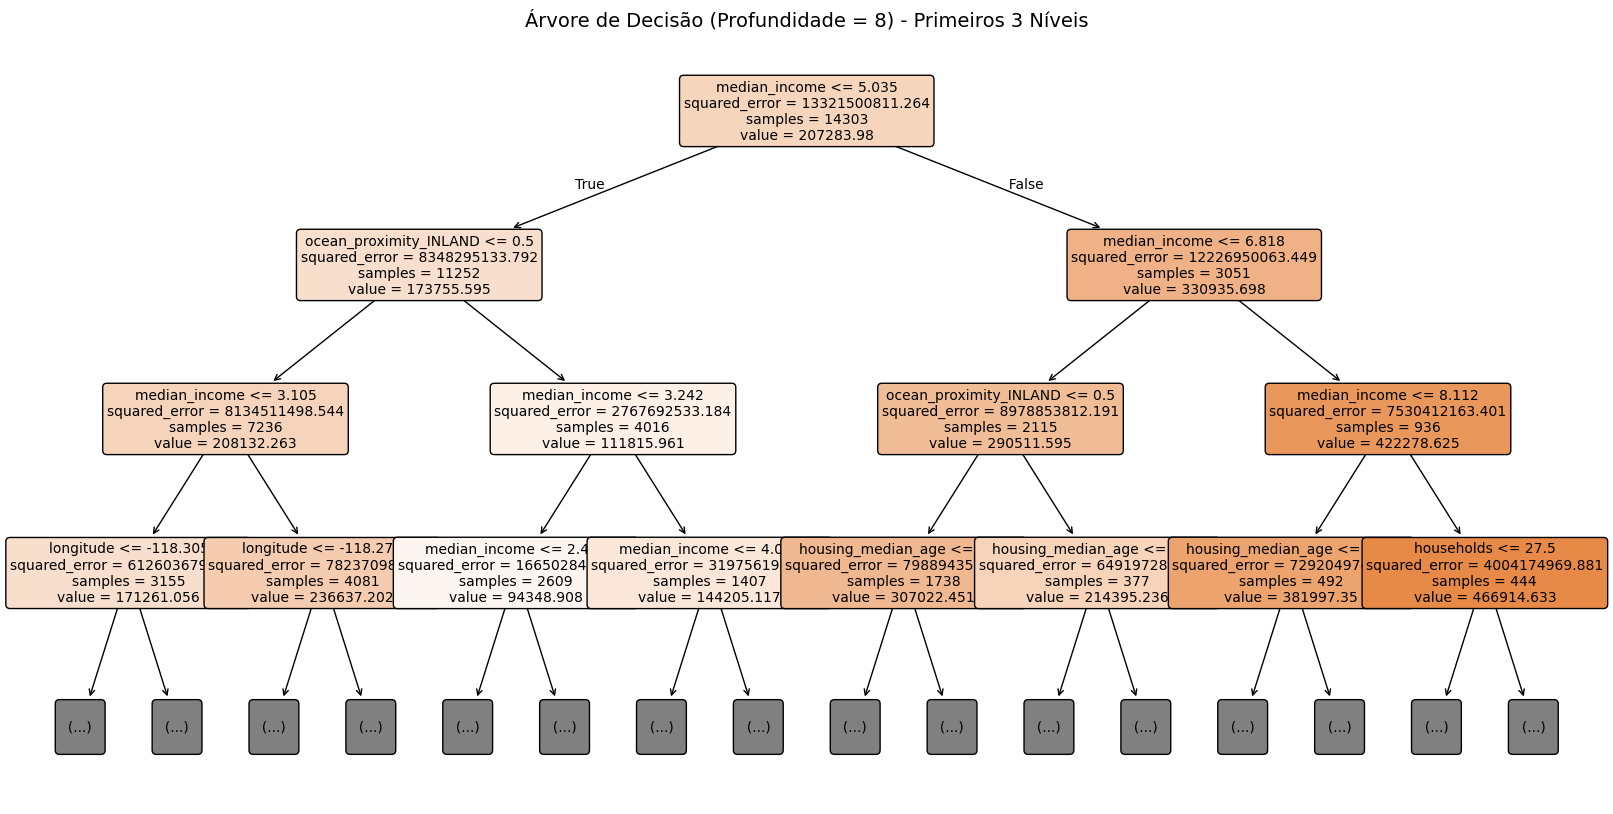

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(
    arvore_2,
    feature_names=X.columns, 
    filled=True,             
    rounded=True,         
    fontsize=10
)
plt.title("Árvore de Decisão (Profundidade = 2)", fontsize=14)
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(
    arvore_8,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=3,  
    fontsize=10
)
plt.title("Árvore de Decisão (Profundidade = 8) - Primeiros 3 Níveis", fontsize=14)
plt.show()